#Discovery Assignment Step 2

In this step, I will read the cscv file created in [step 1](https://github.com/fdac15/T7P1/blob/master/almasaeed2010_discovery.ipynb) and attempt to detect a corelation between the number of stars a repository has and the popularity of the programming language used.

In [25]:
library(data.table)
github_repos <- fread("almsaeed2010_measures.csv", header=TRUE, sep=",")
# colnames(bitbucket_repos)<- c("html_url","stargazers_count","language")

Read 9527028 rows and 3 (of 3) columns from 0.443 GB file in 00:00:17


In [26]:
summary(github_repos)

   html_url         stargazers_count      language        
 Length:9527028     Min.   :   -1.000   Length:9527028    
 Class :character   1st Qu.:    0.000   Class :character  
 Mode  :character   Median :    0.000   Mode  :character  
                    Mean   :    0.846                     
                    3rd Qu.:    0.000                     
                    Max.   :27461.000                     

In [27]:
sorted <- github_repos[order(-github_repos$stargazers_count), ]

In [39]:
print(sorted[0:15])

                                       html_url stargazers_count   language
 1:           https://github.com/torvalds/linux            27461          C
 2:       https://github.com/impress/impress.js            25725 JavaScript
 3:            https://github.com/moment/moment            23353 JavaScript
 4:        https://github.com/Homebrew/homebrew            20383       Ruby
 5: https://github.com/resume/resume.github.com            19859 JavaScript
 6:            https://github.com/moment/moment            18876 JavaScript
 7:      https://github.com/daneden/animate.css            17907        CSS
 8:           https://github.com/torvalds/linux            17877          C
 9:          https://github.com/nnnick/Chart.js            17038 JavaScript
10:          https://github.com/select2/select2            15302 JavaScript
11: https://github.com/resume/resume.github.com            14462 JavaScript
12:          https://github.com/ansible/ansible            13510     Python
13:         

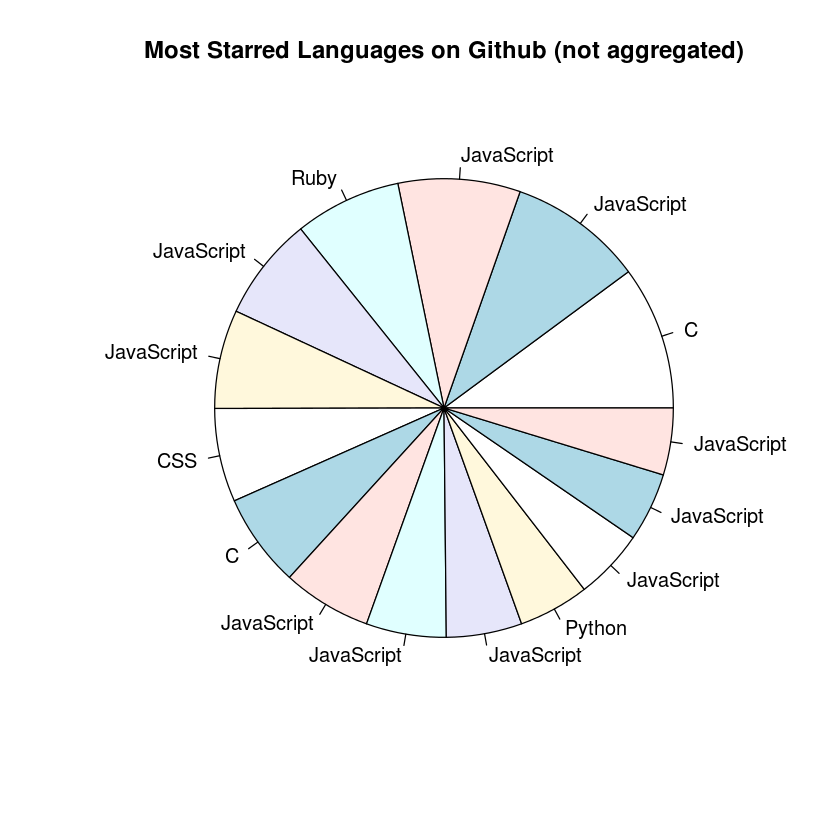

In [85]:
s <- sorted$stargazers_count[0:15]
l <- sorted$language[0:15]

pie(s, labels = l, main="Most Starred Languages on Github (not aggregated)")

In [30]:
# Get the most popular (based on use) repos on Github
as.data.frame(sort(table(github_repos$language), decreasing=T))

,"sort(table(github_repos$language), decreasing = T)"
,4169591
JavaScript,1046794
Java,914116
Python,439956
PHP,439740
Ruby,396699
CSS,320986
C++,294721
C,266069
C#,231455


In [54]:
agg <- aggregate(github_repos$stargazers_count, by=list(github_repos$language), FUN=sum)

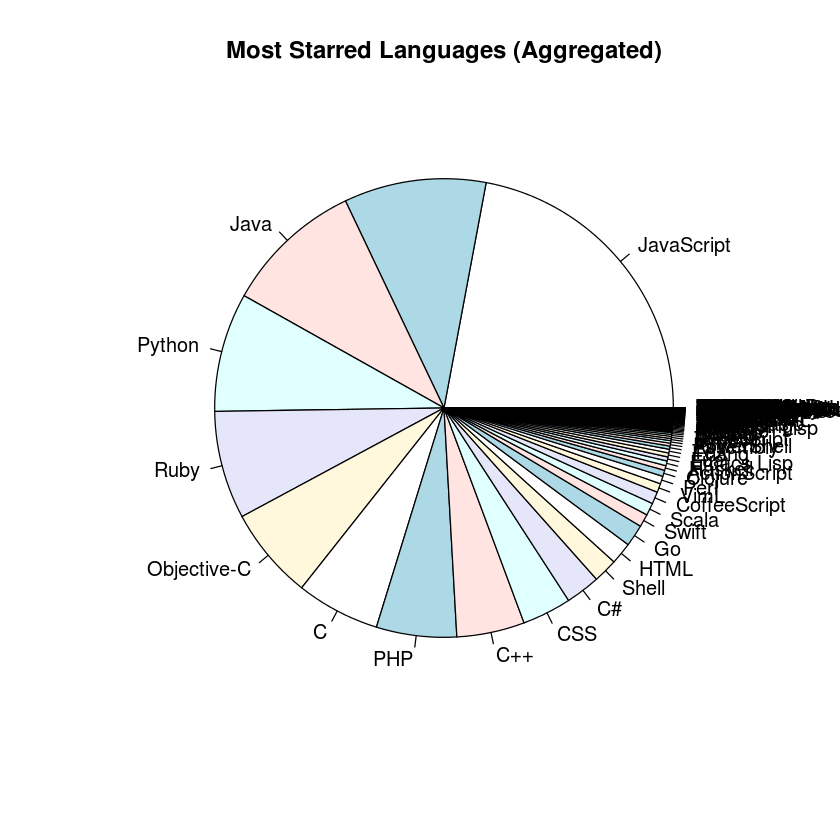

In [86]:
# Most starred languages as a pie chart
pie(c(agg[order(-agg[2]),][2]$x), labels=c(agg[order(-agg[2]),][1]$Group.1), main="Most Starred Languages (Aggregated)")

# Results

Since I haven't done much analysis before, I can't say this is the best way to find out if there is a correlation between the language used and the number of stars. However, from the information I obtained, I can determine a few things:
- The most popular language used on Github is Javascript. This is obvious since it's both the most starred language and the most used language as can be seen from the analysis above.
- The repositories that don't have a language are represented with "null". When I looked into the most starred null repos, they are collections of articles, books and tutorials rather than code. Those kind of repositories fall right under Javascript in popularity.
- From my own experience with software development, I can tell that the repositories starred the most have the ability to produce stand-alone modules. It is more difficult to create modules using HTML for example versus PHP or Python which offer native support to include third-party resources. 
- Some of the repos that fall lower on the list are mostly tools to ease and speed the use of a certain language. Examples of that are CoffeeScript and Objective-c++.
- I feel that Github users, value web related technologies the most followed by mobile app developement tools. This is derived from the fact that Javascript, Ruby, PHP, CSS, HTML, and Python (which can be used for both web and non-web apps) are on the top of te list. The next set of most starred repos represent mobile app development tools such as Objective-c for iOS, Java for Android and Swift for iOS. Since Swift is a fairly new language, I excpect more and more repositories show up in the future.

Of course, these relations only apply to publicly available Github repos. There is a chance that the results could change if we were able to analyse private repos too. Also, it should be noted that some of the languages analyzed are very new such as Go and Swift. Those are popular languages and are gaining more and more users everyday which may again change the results of this analysis in the future.